In [30]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', color_codes = True)

In [31]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

#### Filtering to experiments with 21 PCR cycles, and containing Resolution index data only 

In [32]:
ps = ps[['>400','Ratio','PCR cycles','SM_QC_PF','Resolution index','Bad dates']]
ps = ps[ps['PCR cycles'] == 21]
ps = ps[ps['Bad dates'] != 'x']
ps = ps.drop('Bad dates', 1)
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps.dropna(subset = ['Resolution index'], inplace = True)
ps['>400'] = pd.to_numeric(ps['>400'].str.replace('',''), errors='coerce')
ps['Ratio'] = pd.to_numeric(ps['Ratio'].str.replace('',''), errors='coerce')
ps.dropna(subset = ['Resolution index'], inplace = True)
ps.head()

,>400,Ratio,PCR cycles,SM_QC_PF,Resolution index
4718,461,0.54,21.0,pass,0.787397
4720,979,0.71,21.0,pass,0.000000
4721,456,0.55,21.0,pass,0.322631
4722,1193,0.81,21.0,pass,0.322631
4723,1319,0.59,21.0,pass,0.000000


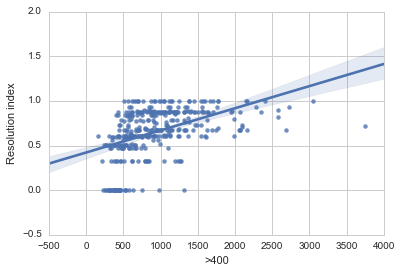

In [67]:
sns.regplot(x = '>400', y = 'Resolution index', data = ps)

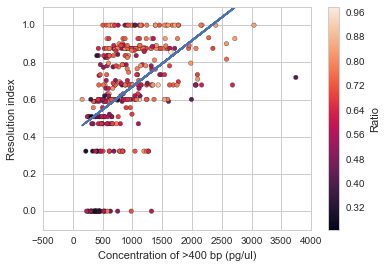

In [65]:
x = ps['>400']
y = ps['Resolution index']
z = ps['Ratio']

plt.xlabel('Concentration of >400 bp (pg/ul)')
plt.ylabel('Resolution index')


plt.scatter(x, y, c=z)
plt.ylim(-0.1,1.1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
cbar = plt.colorbar()
cbar.set_label('Ratio')

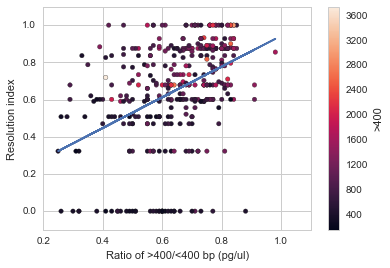

In [66]:
z = ps['>400']
y = ps['Resolution index']
x = ps['Ratio']

plt.xlabel('Ratio of >400/<400 bp (pg/ul)')
plt.ylabel('Resolution index')


plt.scatter(x, y, c=z)
plt.ylim(-0.1,1.1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
cbar = plt.colorbar()
cbar.set_label('>400')

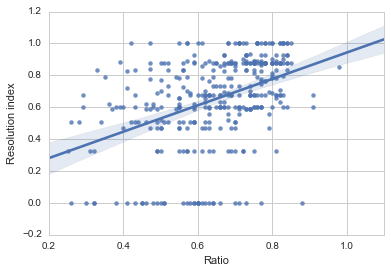

In [23]:

sns.regplot( x = 'Ratio', y = 'Resolution index', data = ps)